In [1]:
import time
import numpy as np
import types
import os
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.special import zeta
import PRyM.PRyM_init as PRyMini
import PRyM.PRyM_thermo as PRyMthermo
import PRyM.test_main3 as test_main
#import PRyM.PRyM_jl_sys as PRyMjl
from numdifftools import Derivative
import PRyM.PRyM_eval_nTOp as PRyMevalnTOp
import PRyM.PRyM_nTOp as PRyMnTOp
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
PRyMini.stasis_params

{'gamma': 7,
 'delta': 1,
 'm0': 1.0,
 'Delta_m': 1.0,
 'N_SPECIES': 10,
 'GAMMA_OVER_H': 100000.0,
 'stasis_end_mev': 50,
 'tiny_radiation': 0.01,
 'plasma_inject_frac': 0.1,
 'alpha': 1.0}

In [ ]:
#creates plots that Tim is looking for

PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = False
PRyMini.stasis_flag = True
PRyMini.verbose_flag = False

Tends = np.logspace(-3,1,200)



# Optional: write header only once
with open("results.txt", "w") as f:
    f.write("Tend Neff Omeganurel 1/Omeganunr YPCMB YPBBN DoHx1e5 He3oHx1e5 Li7oHx1e10\n")

for T in Tends:
    PRyMini.stasis_params['stasis_end_mev'] = T
    results = test_main.PRyMclass().PRyMresults()
    Neff_f, Omeganurel_f, OneOverOmeganunr_f, YPCMB_f, YPBBN_f, DoHx1e5_f, He3oHx1e5_f, Li7oHx1e10_f = results

    #Save this result immediately
    with open("results.txt", "a") as f:
        f.write(f"{T:.6g} {Neff_f:.6g} {Omeganurel_f:.6g} {OneOverOmeganunr_f:.6g} "
                f"{YPCMB_f:.6g} {YPBBN_f:.6g} {DoHx1e5_f:.6g} {He3oHx1e5_f:.6g} {Li7oHx1e10_f:.6g}\n")



In [4]:
columns = [
    "Tend", "Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df = pd.read_csv("results.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)

/tmp/ipykernel_2683024/672520705.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("results.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)


In [5]:
df

,Tend,Neff,Omeganurel,OneOverOmeganunr,YPCMB,YPBBN,DoHx1e5,He3oHx1e5,Li7oHx1e10
0,0.001000,4.38039,8.20054,70.8158,0.294224,0.295710,4.21974,1.26810,3.40455
1,0.001207,4.37711,8.19439,70.8557,0.293174,0.294657,4.18802,1.26461,3.42559
2,0.001456,4.37322,8.18712,70.9029,0.292568,0.294049,4.14370,1.25663,3.49760
3,0.001758,4.36885,8.17893,70.9561,0.292036,0.293515,4.10380,1.24905,3.56247
4,0.002121,4.36394,8.16974,71.0159,0.291280,0.292757,4.09600,1.24919,3.55011


In [10]:
# Example x and y

# Create DataFrame
df = pd.DataFrame({'Tends': Tends, 'Neff_fs': Neff_fs,'Omeganurel_fs': Omeganurel_fs, 'OneOverOmeganunr_fs': OneOverOmeganunr_fs,'YPCMB_fs': YPCMB_fs, 'YPBBN_fs': YPBBN_fs,'DoHx1e5_fs': DoHx1e5_fs, 'He3oHx1e5_fs': He3oHx1e5_fs,'Li7oHx1e10_fs': Li7oHx1e10_fs})

df.to_csv('data.txt', sep='\t', index=False)

In [ ]:
self.Neff_f,self.Omeganurel_f,self.OneOverOmeganunr_f,self.YPCMB_f,self.YPBBN_f,self.DoHx1e5_f,self.He3oHx1e5_f,self.Li7oHx1e10_f

In [6]:
#if computed already, this is even faster
PRyMini.stasis_params['stasis_end_mev'] = 5
PRyMini.stasis_params['N_SPECIES'] = 5

#PRyMini.stasis_params['GAMMA_OVER_H'] = 2
PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = True
# No need to recompute n <--> p  rates as well
PRyMini.compute_nTOp_flag = False 
PRyMini.save_nTOp_flag = False
PRyMini.stasis_flag = True
PRyMini.verbose_flag = True
# Compute PRyMordial observables: now faster!
res = test_main.PRyMclass().PRyMresults()

 
###########################################################
################## Welcome to PRyMordial ##################
###########################################################
Switch from natural units to CGS.
 
Solving neutron decoupling at high temperature era
--- running time: 15.011958122253418 seconds ---
 
PRyM_nuclear_rates.py: Interpolating nuclear rates
 
Solving nuclear network at mid temperature era
--- running time: 20.590147256851196 seconds ---
 
Solving nuclear network at low temperature era
--- running time: 49.65069818496704 seconds ---
 
-------------------------------------------------
Predicted primordial abundances at the end of BBN
-------------------------------------------------
Yp =  0.7528473784809188
Yd =  1.853998235210992e-05
Yt =  5.9180022544371596e-08
YHe3 =  7.786089259488043e-06
Ya =  0.06177300103239453
YLi7 =  2.155338914167946e-11
YBe7 =  3.870349755830276e-10
 
--- PRyMordial runned in: 49.65104007720947 seconds ---


In [4]:
#redefine parameters
PRyMini.stasis_params['GAMMA_OVER_H'] = 0.01
PRyMini.stasis_params['N_SPECIES'] = 10

PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = True
PRyMini.stasis_flag = True

In [5]:
pry = test_main.PRyMclass()

 
###########################################################
################## Welcome to PRyMordial ##################
###########################################################
Switch from natural units to CGS.
 
Solving neutron decoupling at high temperature era
--- running time: 9.949777126312256 seconds ---
 
Solving nuclear network at mid temperature era
--- running time: 13.214663982391357 seconds ---
 
Solving nuclear network at low temperature era
--- running time: 30.829946994781494 seconds ---
 
-------------------------------------------------
Predicted primordial abundances at the end of BBN
-------------------------------------------------
Yp =  0.7529050503692944
Yd =  1.8524415651094615e-05
Yt =  5.910203957877764e-08
YHe3 =  7.786842790146394e-06
Ya =  0.0617585958148015
YLi7 =  2.1525909319074636e-11
YBe7 =  3.870801478140831e-10
 
--- PRyMordial runned in: 30.83023691177368 seconds ---


In [ ]:
#if computed already, this is even faster
PRyMini.compute_bckg_flag = True
PRyMini.save_bckg_flag = True
# No need to recompute n <--> p  rates as well
PRyMini.compute_nTOp_flag = False 
PRyMini.save_nTOp_flag = False
#PRyMini.stasis_flag = True
PRyMini.verbose_flag = True
# Compute PRyMordial observables: now faster!
res = test_main.PRyMclass().PRyMresults()

 
###########################################################
################## Welcome to PRyMordial ##################
###########################################################
1.0
4.436110190887499e-19
5.678221044335998e-33
Switch from natural units to CGS.
 
Solving neutron decoupling at high temperature era
--- running time: 1.4747049808502197 seconds ---
 
Solving nuclear network at mid temperature era
--- running time: 4.660178899765015 seconds ---
 
Solving nuclear network at low temperature era
--- running time: 20.145437002182007 seconds ---
 
-------------------------------------------------
Predicted primordial abundances at the end of BBN
-------------------------------------------------
Yp =  0.7530465682203513
Yd =  1.8482373300595917e-05
Yt =  5.8984277156097974e-08
YHe3 =  7.781210867092078e-06
Ya =  0.06172324345250969
YLi7 =  2.1463844336991193e-11
YBe7 =  3.881667895417733e-10
 
--- PRyMordial runned in: 20.145732879638672 seconds ---


In [14]:
res

array([ 3.04438852,  5.69940717, 93.03360798,  0.24556705,  0.24689297,
        2.45434666,  1.04113019,  5.43964545])

In [6]:
res

array([2.14860092e-05, 4.02240101e-05, 6.79435294e+05, 2.37768797e-01,
       2.39065958e-01, 2.28423045e+00, 1.01667960e+00, 5.67711847e+00])

In [8]:
sum(np.array([0.066,0.132,0.198,0.264,0.33 ]))

0.99

In [6]:
file_path = '/Users/alechewitt/Desktop/Stasis/Stasis_prym/PRyMrates/thermo/stasis_abundances.txt'
df = pd.read_csv(file_path, delimiter=' ')

NameError: name 'pd' is not defined

In [49]:
temp = df['Tg[MeV]'].tolist()
Omega_m = df['Omega_m'].tolist()
Omega_rad = df['Omega_rad'].tolist()
rho_rad = df['rho_rad'].tolist()
rho_m = df['rho_m'].tolist()

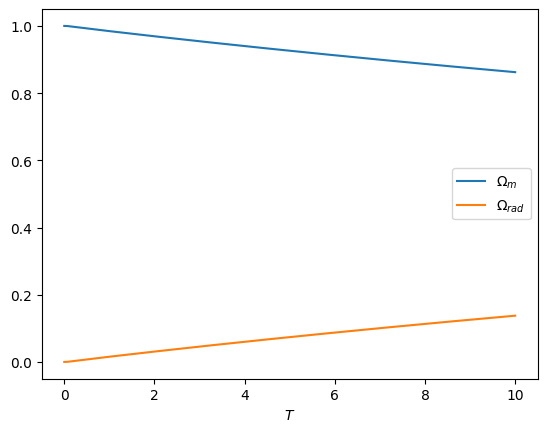

In [50]:
plt.plot(temp,Omega_m,label = r'$\Omega_m$')
plt.plot(temp,Omega_rad,label = r'$\Omega_{rad}$')
plt.xlabel(r'$T$')
plt.legend()
plt.savefig('Omega.pdf')
plt.show()


In [ ]:
plt.plot(temp,np.log(rho_rad),label = r'$\log(\rho_{rad})$')
plt.plot(temp,np.log(rho_m),label = r'$\log(\rho_{m})$')
plt.ylabel(r'$\log(\rho)$')
plt.xlabel(r'$T$')
plt.xlim(0.1,10)
plt.legend()
plt.savefig('density.pdf')
plt.show()

In [19]:
Omega_m

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0